<a href="https://colab.research.google.com/github/notwarnite/MFDS_Project/blob/main/Grp_4_Problem_3_and_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Sol 3 : Training the model

In [ ]:
# importing required packages
import cvxpy as cp
from cvxpy import *
import numpy as np

In [ ]:
# importing Problem data
A_inv =  np.load('A_inv.npy');
C = np.load('C.npy');
y = np.load('y.npy');
y = y[:,np.newaxis];
print("Shape of A_inv matrix: ",A_inv.shape);
print("Shape of C matrix: ,",C.shape);
print("Shape of y matrix: ",y.shape);

Shape of A_inv matrix:  (9900, 9900)
Shape of C matrix: , (2970, 9900)
Shape of y matrix:  (2970, 1)


In [ ]:
# Construct the problem
# declaring variable s to be optimised
s = cp.Variable((A_inv.shape[0],1));
# objective function
f = cp.norm(s,1);
obj = cp.Minimize(f);
# constraints
cnsts = [C@s == y];
# optimisation problem
prob = cp.Problem(obj,cnsts)

In [ ]:
# Solve with OSQP.
prob.solve(solver=cp.OSQP,verbose=1,max_iter=2000)
print("optimal value with OSQP:", prob.value)
# saving the optimised value of s
np.save('s',s.value)

                                     CVXPY                                     
                                    v1.1.15                                    
(CVXPY) Nov 11 02:28:14 PM: Your problem has 9900 variables, 1 constraints, and 0 parameters.
(CVXPY) Nov 11 02:28:14 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Nov 11 02:28:14 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Nov 11 02:28:14 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Nov 11 02:28:14 PM: Compiling problem (target solver=OSQP).
(CVXPY) Nov 11 02:28:14 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffi

C:\Users\R3M0\anaconda3\envs\38tfgpu\lib\site-packages\cvxpy\problems\problem.py:1278: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


## Sol 4 : Recovering the image

In [ ]:
# importing required packages
import scipy.fftpack as spfft
import scipy.ndimage as spimg
import numpy as np
import matplotlib.pyplot as plt
import imageio

# Inverse 2D Discrete Cosine Transform
# this function is used to find the value of x = As
def idct2(x):
    return spfft.idct(spfft.idct(x.T, norm='ortho', axis=0).T, norm='ortho', axis=0);

# loading the optimised value s
s = np.load('s.npy');
# reshaping s to 2D matrix of shape (99,100)
s_img = np.reshape(np.array(s),(99,100));
# recovering the image
x_img = idct2(s_img.T);
# scaling the image to get proper values
x_img = (x_img-np.min(x_img))/(np.max(x_img)-np.min(x_img));

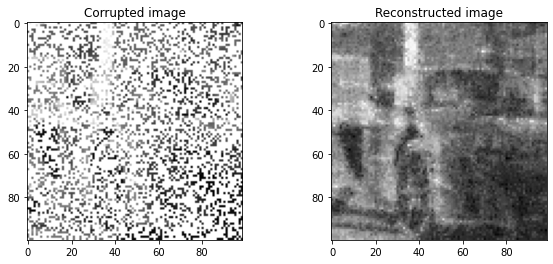

In [ ]:
# reading the corrupted image in grayscale mode
x_cor =imageio.imread('incomplete.png', pilmode='L');

# plot to compare the 2 images
plt.figure(figsize=(10,4));
# plotting corrupted image in grayscale
plt.subplot(121);
plt.imshow(x_cor,cmap='gray');
plt.title("Corrupted image");
# plotting recovered image in grayscale
plt.subplot(122);
plt.imshow(x_img,cmap='gray');
plt.title("Reconstructed image");